In [ ]:
from movement import Mover, Limb
from converter import MoverToMujocoConverter

m = Mover(2)
m.torso.segments[0].add_child_limb_to_terminus(Limb(3))

""

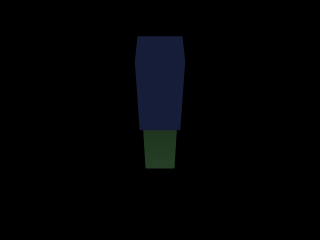

In [5]:
# Convert to MuJoCo
import mujoco
import mediapy as media

xml = f"""
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    {MoverToMujocoConverter.convert(m)}
  </worldbody>
</mujoco>
"""

model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)

with mujoco.Renderer(model) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data)

  media.show_image(renderer.render())